# Distributioni

In [1]:
from utils import set_pyplot_params
set_pyplot_params()

Nel capitolo precedente abbiamo usato il teorema di Bayes per risolvere il problema dei biscotti, abbiamo poi risolto sempre lo stesso problema usando le tabelle di bayes.

In questo capitolo al costo di provare la pazienza, risolveremo ancora questo problema usando l'oggetto `Pmf` che rappresenta una "probability mass function" tradotto in italiano funzione di probabilità.
Rispieghiamo cosa significa e perchè è utile per la statistica Bayesiana.
Useremo l'oggetto `Pmf` per risolvere alcuni problemi più impegnativi e fare un ulteriore passo in avanti sulla statistica bayesiana.

Ma ripartiamo con le distribuzioni.

## Distribuzioni

In statistica una distribuzione è un insieme di possibili risultato e le loro corrispondenti probabilità. Per esempio, se lanciamo una moneta, abbiamo due possibili risultati con approssimativamente una eguale probabilità. Sempre se lanciamo un dado a sei facce, l'insieme di tutti i possibili risultati sono i numeri da 1 a 6 e le probabilità associate ad essi sono 1/6.

Una distribuzione "empirica" è basata sui dati, che è opposta alla distribuzione teorica. Vediamo come funziona l'oggetto `Pmf` che useremo per tutto il libro.

## Funzione di probabilità (Pmf)

Se i risultati di una distribuzione sono discreti, possiamo descrivere la distribuzione con una **funzione di probabilità**, questa è una funzione che mappa ogni possibile risultato con la sua probabilità.

Importiamo l'oggetto `Pmf` e usiamolo per rappresentare i risultati di distribuzione di probabilità per il lancio di una monetina:

In [2]:
from distribution import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


Possiamo anche creare un oggetto `Pmf` da una sequenza di possibilit risultati.
L'esempio seguente usa `Pmf.from_seq` per creare un oggetto `Pmf` che rappresenta un dado a sei facce.

In [3]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In questo esempio, tutti i risultati nella seqeunza appaiono una sola volta e hanno tutti la stessa probabilità, 1/6.
Più generalmente i risultati possono apparire più volte come nel seguente esempio:

In [4]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


La lettera `M` appare solo una volta su 11 caratteri, dunque la sua probabilità e $1/11$.
La lettera  `i` appare 4 volte, dunque la sua probabilità è di $4/11$.

Siccome le lettere in una string sono sono il risultato di un processo random. Useremo il termine più generale di "quantità" per le lettere nel `Pmf`.

La classe `Pmf` eredita dall'oggetto Pandas `Series`, dunque tutto quello che può fare una `Series` lo si può fare anche con `Pmf`.

Per esempio possiamo usare l'operatore parentesi per controllare una quantità e ottenere la corrispondente probabilità.

In [5]:
letters['s']

0.36363636363636365

Nella parola "Mississippi" circa il 36% delle lettero sono "s".
Comunque, se chiediamo la probabilità di una quantità che non è in una distribuzione otteremo una `KeyError`.

In [6]:
try:
    letters['t']
except KeyError as e:
    print(type(e))

<class 'KeyError'>


Possiamo anche chiamare `Pmf` come se fosse una funzione con la lettera nelle parentesi.

In [7]:
letters('s')

0.36363636363636365

Se la quantità è nella distribuzione il risultato è lo stesso.
Ma se la stessa non è nella distribuzione, il risultato sarà `0`, non un errore.

In [8]:
letters('t')

0

Con le parentesi, possiamo anche usare delle sequenze di quantità e ottenere una sequenza di probabilità.

In [9]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

# Il problema dei biscotti rivisitato

In questa sezione useremo `Pmf` per risolvere il problema dei biscotti. Qui il problema
Supponiamo di avere due ciotole di biscotti.

La ciotola 1 contiene 30 biscotti alla vanigia e 10 al cioccolato.
La ciotola 2 contiene 20 biscotti alla vaniglia e 20 al cioccolato.

Ora supponiamo di scegliere uno delle ciotole a caso e senza guardare, si sceglie un biscotto in modo randomico.
Se il biscotto è alla vaniglia quale è la probabilità che venga dalla ciotola 1?.
Qui il `Pmf` che rappresenta le due ipotesi e le loro probabilità a priori: 

In [10]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


Questa distribuzione che contiene le probabilità a priori di ogni ipotesi è chiamata distribuzione a priori.
Per aggiornare la distribuzione basata sui nuovi dati (i biscotti alla vaniglia), possiamo moltiplicare le probabilità a priori con le verosomiglianze. 

La verosomiglianza di ottenere un biscotto alla vaniglia per la ciotola 1 e di 3/4. La verosomiglianza della ciotola 2 e di 1/2.

In [11]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


Il risultato è una probabilità a posteriori non normalizzata; Per normalizzarla usiamo il metodo che viene fornito con `Pmf`.

In [12]:
posterior.normalize()

0.625

Il valore di ritorno della funzione `normalize` è la probabilità totale del dato (biscotto alla vaniglia) che è pari a  $5/8$.
`posterior` contene la probabilità a poteriori per ogni ipotesi ed è chiamata **distribuzione a posteriori**.

In [13]:
posterior


,probs
Bowl 1,0.6
Bowl 2,0.4


Dalla distribuzioni a posteriori possiamo scegliere la probabilità della ciotola 1:

In [14]:
posterior('Bowl 1')

0.6

E la risposta è 0.6.
Un beneficio di usare gli oggetti `Pmf` è che è semplice fare successivi aggiornamenti con più dati. 
Per esempio, supponiamo di mettere il primo biscotto nella ciotola di appartenenza (dunque i contenuti non cambiano) e di pescare ancora dalla stessa ciotola.

Se il secondo biscotto e ancora alla vaniglia possiamo fare un secondo aggiornamento: 

In [15]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Ora la probabilità della ciotola 1 e di circa il 70%. Ma supponiamo di fare la stessa cosa e di ottenere un biscotto alla cioccolata.

Ora le verosomiglianze del nuovo dato saranno:

In [16]:
likelihood_chocolate = [0.25, 0.5]

E qui l'aggiornamento:

In [17]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


Ora la probabilità a posteriori per la ciotola 1 è circa del 53%.
Dopo due biscotti alla vaniglia e uno alla cioccolata, la probabilitàa a posteriori è circa del 50/50.

## 101 Ciotole
Ora risolviamo il problema dei biscotti con 101 ciotole:

* La ciotola 0 contiene il 0% di biscotti alla vaniglia
* La ciotola 1 contiene il 1% di biscotti alla vaniglia
* La ciotola 2 contiene il 2% di biscotti alla vaniglia

e cosi:

* La ciotola 99 contiene il 99% di biscotti alla vaniglia
* la ciotola 100 coniene il 100% di biscotti alla vaniglia

Come visto nella versione precedente, ci sono due tipo di biscotti, vaniglia e cioccolata.
Dunque la ciotola 0 è composta da solo biscotti alla cioccolata, la ciotola 1 con il 99% biscotti alla cioccolata e così via.

Supponiamo di scegliere una ciotola a caso, prendiamo un biscotto a caso, e otteniamo un biscotto alla vaniglia. Quale è la probabilità che il biscotto provenga dalla ciotola $x$, per ogni valore di $x$?

Per risolvere questo problema, useremo la funzione `np.arange` per creare un array con 101 ipotesi, numerati da 0 a 100.

In [18]:
import numpy as np

hypos = np.arange(101)

Possiamo usare questo array per creare una distribuzione a priori:

In [19]:
prior = Pmf(1, hypos)
prior.normalize()

101

Questo esempio mostra che possiamo creare un oggetto `Pmf` con due parametri.
Il primo parametro è la priorità a priori; il secondo parametro è una sequenza di quantità.
In questo esempio le probabilità sono le stesse, quindi dobbiamo fornirne solo una; e questa verra trasmessa "broadcast" attraverso tutte le ipotesi.

Visto che tutte le ipotesi hanno la stessa probabilità, questa distribuzione è **uniforme**.
Qui vediamo le prime ipotesi e le loro probabilità.

In [20]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


L'aspettativa del dato è una frazione dei biscotti alla vaniglia in ogni ciotola, possiamo quindi calcolarle usando `hypos`:

In [21]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

Ora possiamo calcolare la distribuzione a posteriori nel solito modo:

In [22]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


In [23]:
posterior1.tail()

,probs
98,0.019406
99,0.019604
100,0.019802


La figura qui sotto mostra la distribuzione a priori e quella a posteriori dopo un biscotto alla vaniglia.

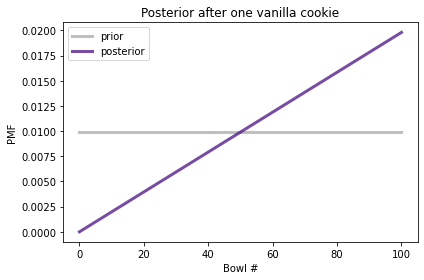

In [24]:
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

La probabilità a posteriori della ciotola è 0 perchè non contiene biscotti alla vaniglia. La probabilità a posteriori della ciotola 100 è la più alta perchè contiene tutti biscotti alla vaniglia. In mezzo la distribuzione è lineare in quanto l'aspettativa è proporzionale al numero della ciotola.

Ora supponiamo di estrarre un biscotto ancora dalla stessa ciotola e di ottenere un altro biscotto alla vaniglia. 
Qui l'aggiornamento dopo il secondo biscotto:

In [25]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999999

E qui la distribuzione a posteriori.

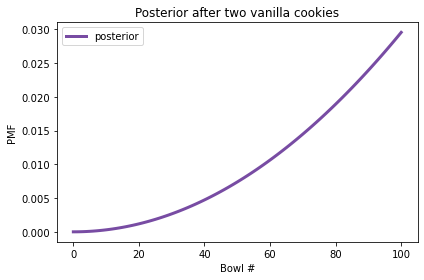

In [26]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

Dopo due biscotti alla vaniglia, le ciotole con un numero alto hanno un'alta probabilità perchè contiene più biscotti alla vaniglia, i numeri bassi hanno una probabilità più bassa.

Ma supponiamo di pescare ancora e ottenere un biscotto al ciocolata.
Qui l'aggiornamento:

In [27]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

E qui la distribuzione a posteriori.

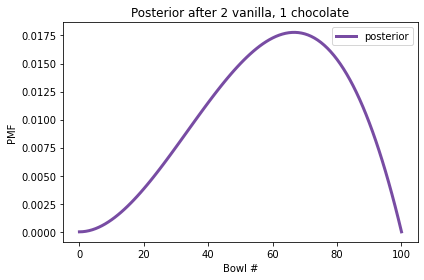

In [28]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

Ora la ciotola 100 è stata eliminata perchè non contiene biscotti alla cioccolata, ma le ciotole con un numero alto sono più probabili delle ciotole con un numero basso, in quanto abbiamo visto più biscotti alla vaniglia che al cioccolato. 

Nei fatti il picco della probabilità a posteriori è alla ciotola 67 che corrisponde alla frazione alla frazione dei biscotti alla vaniglia che abbiamo osservato 2/3.

La quantità con la probabilità a posteriori più alta è chiamata MAP, che sta per "stima del massimo a posteriori", "maximum a posteriori probability".
Per calcolare il MAP, possiamo usare il metodo `idxmax` dell'oggetto `Series`:

In [29]:
posterior3.idxmax()

67

Oppure `Pmf` provvede un'altro metodo per la stessa cosa:

In [30]:
posterior3.max_prob()

67

Come puoi sospettare, in questo esempio non riguarda realmente le ciotole; si tratta di stimare le proporzioni.
Immagina di avere una ciotola di biscotti.
Tu non conosci quale è la frazione dei biscotti alla vaniglia, potresti pensare che sia equalmente distribuito tra 0 e 1.
Possiamo estrarre tre biscotti e que alla vaniglia, quale porzioni di biscotti nella ciotola sono alla vaniglia? 
La distribuzione a posteriori che abbiamo calcolato risponde alla domanda.

Torneremo sulla stima delle proporzioni nel prossimo capitolo.
Ma prima usiamo l'oggetto `Pmf` per risolvere il problema dei dadi.

## Il problema dei dadi 

Nel capitolo precedente abbiamo risolto il problema dei dadi usando la tabella di bayes, qui il testo del problema:

> Supponiamo di avere una scatola con un dado a 6 facce uno a 8 facce e uno a 12 facce.
> Scegliamo un dado a caso lo lanciamo e otteniamo come risultato 1.
> Quale è la probabilità di aver scelto un dado a 6 facce ?

Ora risolviamolo usando l'oggetto `Pmf`.
Useremo degli interi per rappresentare le ipotesi:

In [31]:
hypos = [6, 8, 12]

Possiamo creare la distribuzione a priori come questa:

In [32]:
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


Nell'esempio precedente, la priorità a priori veniva trasmessa "broadcast" attraverso le ipotesi. L'oggetto Pmf ha due attributi:

* qs che contiene le quantità della distribuzione
* ps che contiene le corrispondenti probabilità

In [33]:
prior.qs

array([ 6,  8, 12], dtype=int64)

In [34]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

Ora siamo pronti per eseguire l'aggiornamento.
Qui la verosomiglianza dei dati per ogni ipotesi.

In [35]:
likelihood1 = 1/6, 1/8, 1/12

E qui il loro aggiornamento.

In [36]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


La probabilità a posteriori per il dado a 6 facce è pari a $4/9$.
Ora supponiamo di lanciare il dado di nuovo e di ottenere 7.
Qui le verosomiglianze:

In [37]:
likelihood2 = 0, 1/8, 1/12

La verosomiglianza del dato a 6 facce è zero in quanto non è possibile ottenere un 7 in un dado a 6 facce.
Le altre due verosomiglianze sono le stesse dell'esempio precedente
Qui l'aggiornamento:

In [38]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


Dopo il lancio di un 1 e un 7 la probabilità a posteriori di un dado a 8 facce è di circa il 69%.

## Aggiornare i dadi
La seguente funzione è una versione più generale di aggiornamento della sezione precedente:

In [39]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

Il primo parametr è un `Pmf` che rappresenta il possibile dato e la sua probabilità.
Il secondo parametro è il risultato del dado lanciato.

La prima linea seleziona le quantità dal `Pmf` che rappresenta le varie ipotesi,
Visto che le ipotesti sono interi, possiamo usarle per calcolare le verosomiglianze.
In generale, se ci sono `n` facce in un dado, la probabilità di ogni possibilità sarà `1/n`.

Comunque dobbiamo controllare i risultati impossibili!
Se il risultato eccede l'ipotetico numero delle facce del dado, la probabilità del risultato sarà 0.

`impossible` è una `Series` booleana che ha valore `True` per ogni risultato impossibile. 
Usiamo questo come indice della variabile `likelihood` per impostare la corrispondente probabilità a 0.
Finalmente, moltiplichiamo `pmf` per le verosomiglianze e normalizziamo,

Qui vediamo come usare la funzione per calcolare gli aggiornamenti della sezione precedente.

Partiamo dal una copia dei dati della distribuzione a priori:

In [40]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


E usiamo la funzione `update_dice` per eseguire l'aggiornamento:

In [41]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


Il risultato è lo stesso. Vedremo una versione di questa funzione nel prossimo capitolo.

## Sommario

Abbiamo visto come funziona il modulo `Pmf` per rappresentare un insieme di ipotesi e le loro probabilità.
Nel prossimo capitolo introdurremo il problema dell'Euro e vedremo la distribuzione binomiale.
E alla fine faremo il salto usando il teorema di Bayes per fare statistica Bayesiana.

Ma prima lavoriamo sugli esercizi.

## Esercizi

**Esercizio:**
Supponiamo di avere una scatola con un dado a 6 facce, uno a 8 e uno a 12.
Scegliamo un dado a caso, lanciamo 4 volte e ottengo un 1,3,5 e 7.
Quale è la probabilità di aver scelto un dado a 8 facce?


Possiamo usare la funzione `update_dice` o di fare gli aggiornamenti a mano.

In [42]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 3)
update_dice(pmf, 5)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


**Esercizio:** Nella sezione precedente del problema dei dadi, le probabilità a priori sono le stesse perchè la scatola contiene un dado per tipo. Ma supponiamo che il box contenga 1 dado a 4 facce, 2 dadi a 6 facce, 3 dadi a 8 facce, 4 dadi a 12 facce e 5 dadi a 20 facce. 

Prendiamo un dado e otteniamo un 7. Quale è la probabilità di aver scelto un dado a 8 facce?.

*Suggerimento:* Per creare la distribuzione a priori, usiamo `Pmf` con due parametri.

In [43]:
hypos = [4,6,8,12,20]
prob  = [1,2,3,4,5]

pmf = Pmf(prob, hypos)
pmf

,probs
4,1
6,2
8,3
12,4
20,5


In [44]:
update_dice(pmf, 7)
pmf

**Esercizio:** Supponiamo di avere due cassetti per i calzini. Uno contiene un numero eguale di calzini bianchi e neri.
L'altro contiene calzini in egual numero di calzini rossi,verdi e blu, Supponiamo di scegliere un cassetto a caso, scegliamo due calzini a caso e otteniamo una coppia di calzini a caso. Quale è la probabilità che i calzini sia bianco ?

Per semplicità, assumiamo che ci siano talmente tanti calzini in entrambi i cassetti che rimuovendo un calzino apporta una modifica trascurabile delle proporzioni.

In [46]:
socks = Pmf.from_seq(['Cassetto 1', 'Cassetto 2'])

,probs
Cassetto 1,0.5
Cassetto 2,0.5


In [47]:
# i primo cassetto ha due coppie perciò la probabilità di ottenere una coppia è di 1/2
# il secondo cassetto ha tre coppie perciò la probabilità di ottenere una coppia è di 1/3

likesocks = [1/2,1/3]
socks *= likesocks
socks.normalize()
socks

,probs
Cassetto 1,0.6
Cassetto 2,0.4


In [49]:
# ora la probabilità di aver scelto il cassetto 1 è del 60%
# la probabilità di aver scelto la coppia dei calzini bianchi sarà

socks['Cassetto 1'] / 2

0.30000000000000004

**Esercizio:** Qui un problema dal libro [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley ha due fratelli gemelli (che è morto alla nascita). Quale è la probabilità che Elvis sia stato un gemello omozigota?

Suggerimento: Nel 1935 circa 2/3 dei gemelli era eterozigota mentre 1/3 era omozigota.

In [50]:
hypos = ['identical', 'fraternal']
prior = Pmf([1/3, 2/3], hypos)
prior

,probs
identical,0.333333
fraternal,0.666667


In [51]:
likelihood = 1, 1/2
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
identical,0.5
fraternal,0.5
